In [ ]:
!pip install -q keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/major project dataset/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

5600

In [ ]:
paths[:805]

['/content/drive/MyDrive/major project dataset/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_when_fear.wav',
 '/content/drive/MyDrive/major project dataset/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_tough_fear.wav',
 '/content/drive/MyDrive/major project dataset/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_youth_fear.wav',
 '/content/drive/MyDrive/major project dataset/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_turn_fear.wav',
 '/content/drive/MyDrive/major project dataset/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_wash_fear.wav',
 '/content/drive/MyDrive/major project dataset/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_week_fear.wav',
 '/content/drive/MyDrive/major project dataset/TESS Toronto emotional spee

In [ ]:
labels[1:5200:800]

['fear', 'angry', 'disgust', 'neutral', 'sad', 'angry', 'sad']

In [ ]:
labels[800:805]

['angry', 'angry', 'angry', 'angry', 'angry']

In [ ]:
labels[1600:1605]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [ ]:
labels[2401:2405]

['neutral', 'neutral', 'neutral', 'neutral']

In [ ]:
labels[3201:3210]

['sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad']

In [ ]:
labels[5401:5405]

['ps', 'ps', 'ps', 'ps']

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/major project dataset/T...,fear
1,/content/drive/MyDrive/major project dataset/T...,fear
2,/content/drive/MyDrive/major project dataset/T...,fear
3,/content/drive/MyDrive/major project dataset/T...,fear
4,/content/drive/MyDrive/major project dataset/T...,fear


In [ ]:
df.head(5)

,speech,label
0,/content/drive/MyDrive/major project dataset/T...,fear
1,/content/drive/MyDrive/major project dataset/T...,fear
2,/content/drive/MyDrive/major project dataset/T...,fear
3,/content/drive/MyDrive/major project dataset/T...,fear
4,/content/drive/MyDrive/major project dataset/T...,fear


In [ ]:
df['label'].value_counts()

fear       800
neutral    800
happy      800
disgust    800
angry      800
sad        800
ps         800
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

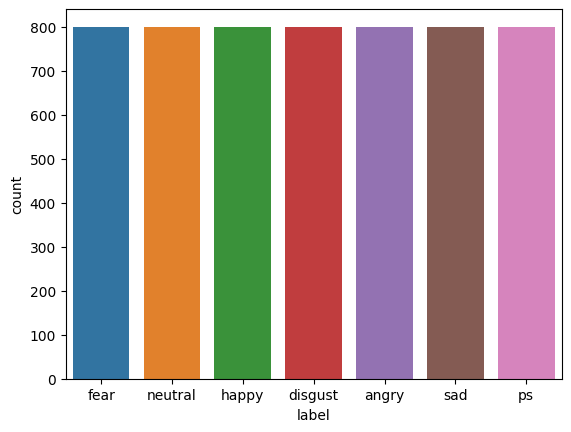

In [ ]:
sns.countplot(x=df['label'])

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()

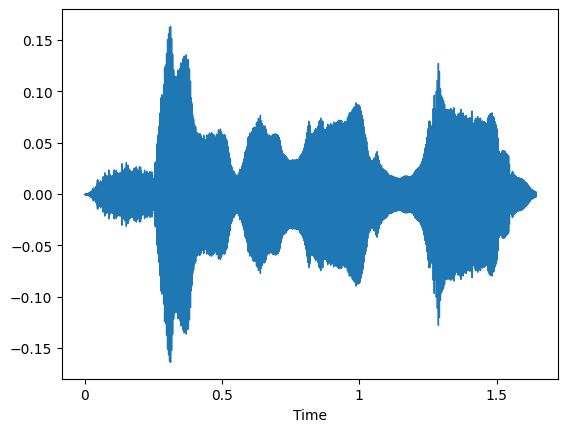

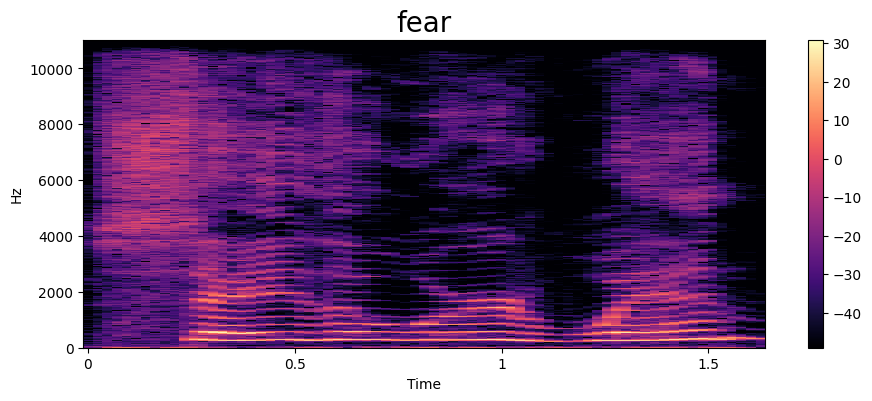

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

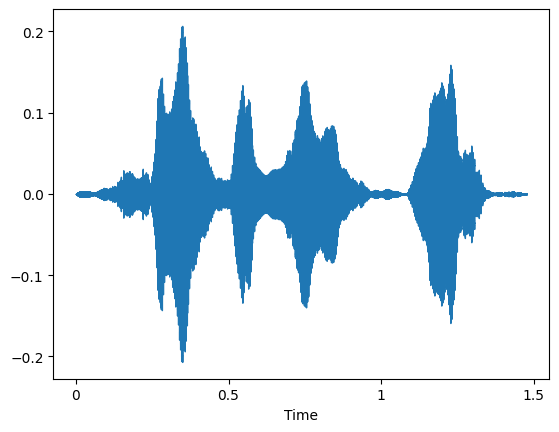

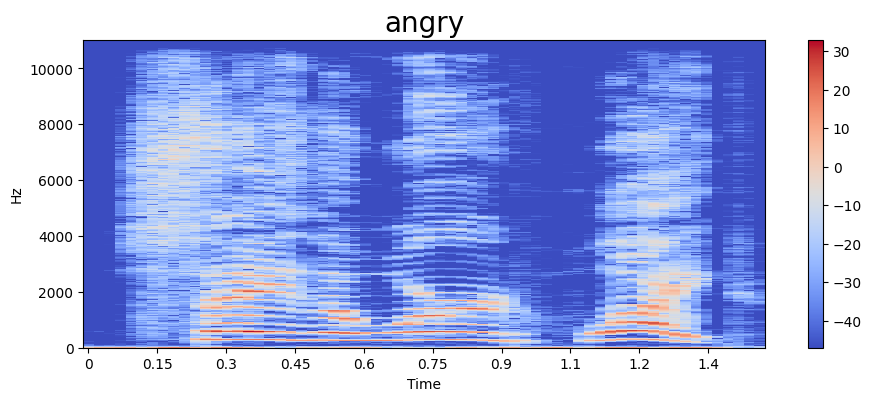

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

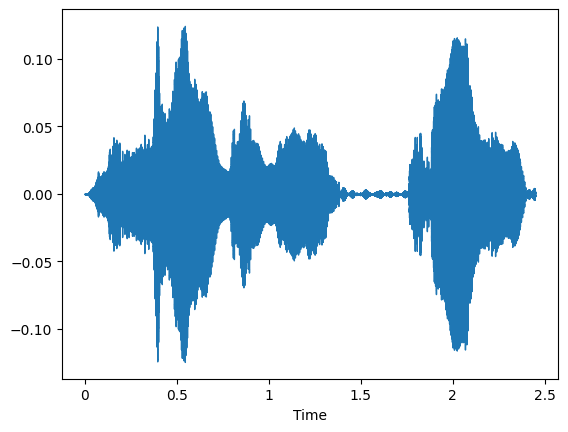

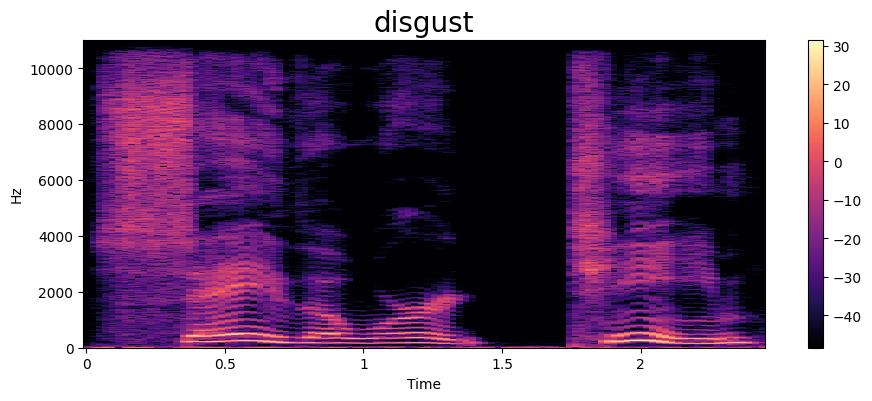

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

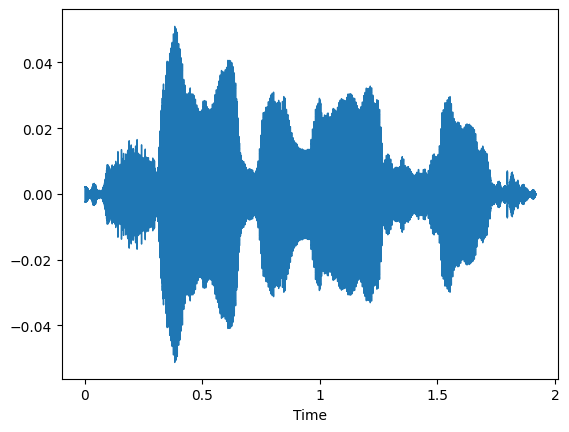

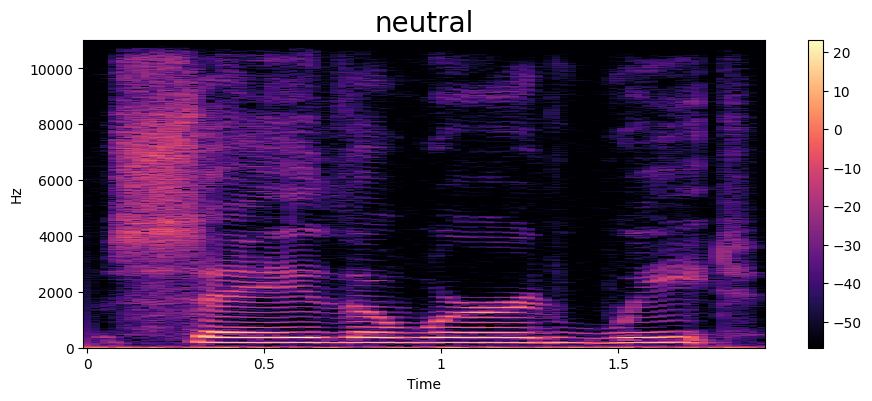

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

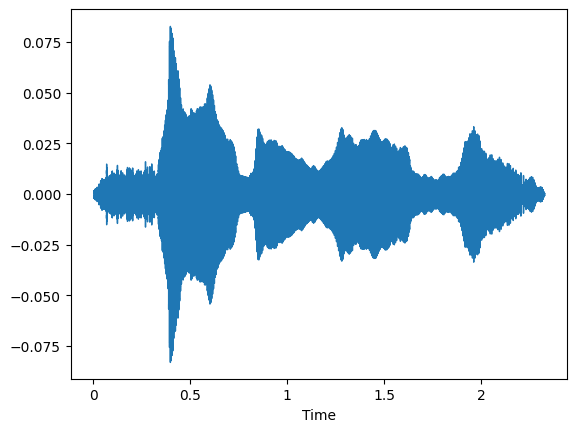

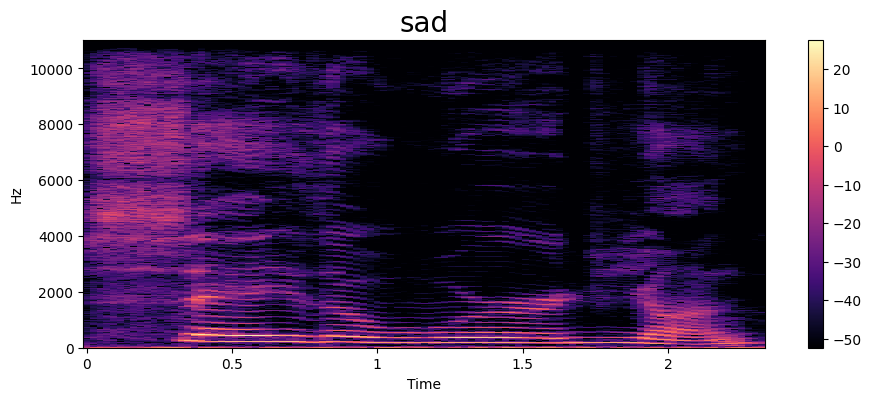

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

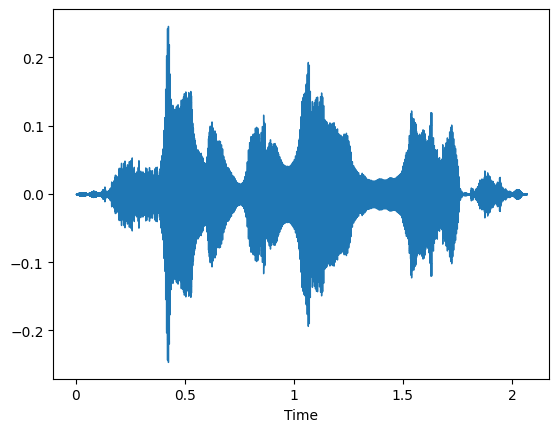

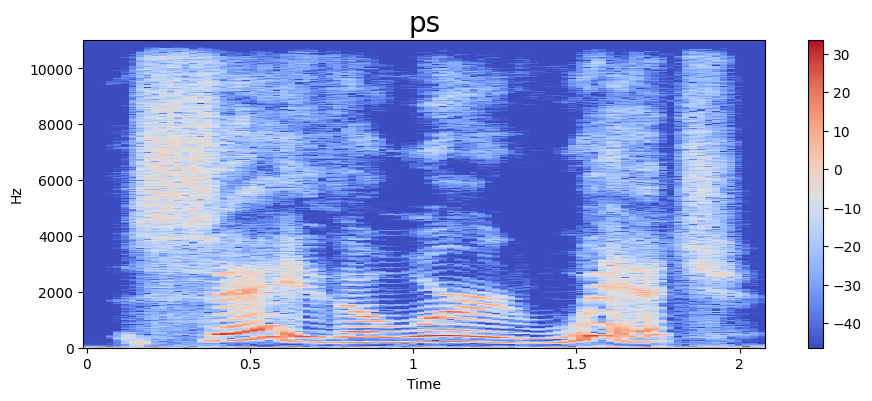

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

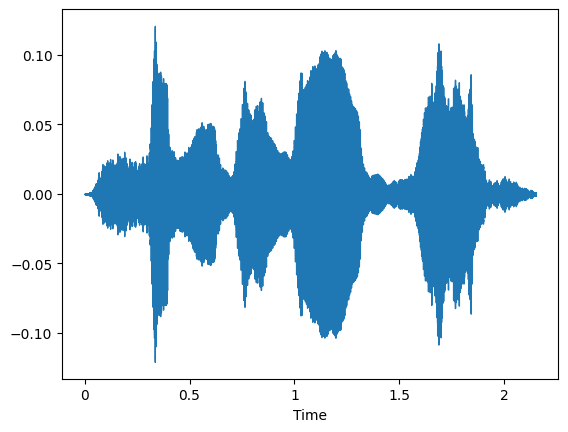

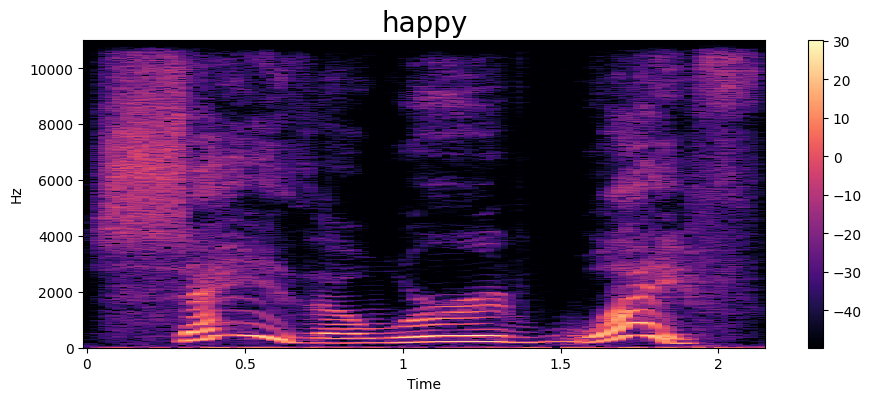

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-447.03625  ,   97.54478  ,   17.762833 ,  -13.757616 ,
         -6.110779 ,   -3.280451 ,  -11.784878 ,    0.9952469,
        -23.72476  ,   -0.550487 ,  -18.052319 ,  -11.3666525,
         -8.921654 ,   -5.3700757,   -4.7595334,   -2.4426262,
         -6.4093165,    2.2464337,   -4.218236 ,   -6.690054 ,
          1.9197628,   10.665087 ,   10.016519 ,   24.113445 ,
         24.49095  ,   34.70821  ,   17.480492 ,   11.774494 ,
          4.014798 ,    3.2759356,    4.345516 ,   10.132032 ,
          2.1495113,   -5.3260694,   -5.3494983,    3.1219065,
         -1.6624315,    2.2651184,   -8.6960945,   -3.9282415],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


In [ ]:
X_mfcc

0       [-447.03625, 97.54478, 17.762833, -13.757616, ...
1       [-454.8798, 75.199585, 6.96195, -14.120413, -6...
2       [-453.43265, 53.22851, 14.091652, 0.6214988, 1...
3       [-432.98602, 83.96954, 16.489561, -15.118281, ...
4       [-407.78436, 72.88476, 4.589863, -18.298637, -...
                              ...                        
5595    [-355.02692, 69.1061, -35.14812, -9.936223, -1...
5596    [-360.17908, 57.33805, -29.098585, -3.1790543,...
5597    [-342.9861, 94.82616, -24.713985, -26.03091, -...
5598    [-334.44708, 63.992416, -6.0932446, 22.286448,...
5599    [-344.4688, 57.871494, -22.21454, -4.995845, -...
Name: speech, Length: 5600, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(5600, 7)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
70/70 [==============================] - 17s 208ms/step - loss: 0.8830 - accuracy: 0.6636 - val_loss: 0.1474 - val_accuracy: 0.9670
Epoch 2/50
70/70 [==============================] - 14s 197ms/step - loss: 0.2737 - accuracy: 0.9185 - val_loss: 0.1391 - val_accuracy: 0.9518
Epoch 3/50
70/70 [==============================] - 14s 207ms/step - loss: 0.1542 - accuracy: 0.9511 - val_loss: 0.0895 - val_accuracy: 0.9732
Epoch 4/50
70/70 [==============================] - 14s 208ms/step - loss: 0.1234 - accuracy: 0.9625 - val_loss: 0.0683 - val_accuracy: 0.9795
Epoch 5/50
70/70 [==============================] - 14s 196ms/step - loss: 0.1157 - accuracy: 0.9621 - val_loss: 0.0304 - val_accuracy: 0.9893
Epoch 6/50
70/70 [==============================] - 19s 276ms/step - loss: 0.0816 - accuracy: 0.9750 - val_loss: 0.0346 - val_accuracy: 0.9902
Epoch 7/50
70/70 [==============================] - 14s 203ms/step - loss: 0.0845 - accuracy: 0.9728 - val_loss: 0.1670 - val_accuracy: 0.9348

In [ ]:
model.save("model.h5")

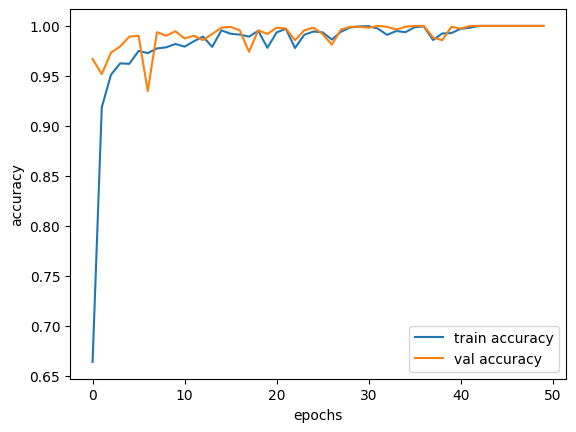

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

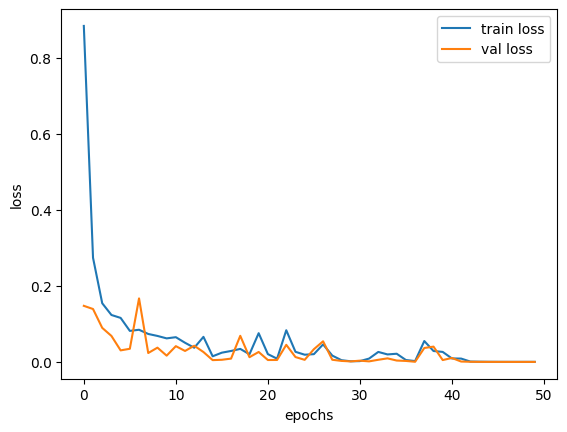

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()